In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import layers, models, Input
from keras.layers import Dense
from keras.optimizers import Adam

**Explanation:**

**numpy as np:** Used for numerical operations and array manipulations.
matplotlib.pyplot as plt: Used for plotting and visualizing images and graphs.

**from keras.datasets import mnist:** Imports the MNIST dataset directly from Keras. MNIST is a dataset of 70,000 handwritten digits (28x28 pixels) ranging from 0 to 9.

**from keras import layers, models, Input: Imports necessary classes for building the neural network.**

**layers:** Provides different types of neural network layers.

**models:** Used for creating and managing models.

**Input:** Used to instantiate a Keras tensor.

**from keras.optimizers import Adam:** Imports the Adam optimizer, a popular optimization algorithm for training neural networks

**Then we will build our model and we will provide the number of dimensions that will decide how much the input will be compressed. The lesser the dimension, the more will be the compression.**

In [ ]:
#Loading and Preprocessing the Data
# Load and preprocess the MNIST dataset
# We only need the images, so we discard the labels (denoted by '_')
(x_train, _), (x_test, _) = mnist.load_data()

**Explanation:**

**mnist.load_data():** Loads the MNIST dataset and returns two tuples:

**(x_train, y_train):** Training images and their labels.

**(x_test, y_test):** Testing images and their labels.
We only need the images for an autoencoder (unsupervised learning), so we discard the labels using _.

In [ ]:
# Normalize the images to values between 0 and 1 and flatten them
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(-1, 784)  # 28*28=784
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(-1, 784)

**Explanation:**

**Normalization:**

**x_train.astype('float32') / 255.:** Converts the pixel values from integers (0-255) to floating-point numbers between 0 and 1.


**Reshaping:**

**x_train.reshape(-1, 784):** Flattens each 28x28 image into a 1D array of 784 pixels.-1 tells NumPy to calculate the size of this dimension automatically based on the array's size and the other dimension specified.
We perform the same steps for x_test.

**Defining the Model Architecture**

In [ ]:

# Input placeholder
input_img = Input(shape=(784,))

**Explanation:**

Input(shape=(784,)): Creates a Keras tensor (placeholder) for input images, which are vectors of size 784 (flattened 28x28 images).

In [ ]:
# Define the dimension of the encoding (latent space) #add when classifier sequential is used
# Encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

**Explanation:**

**encoding_dim = 32:** Specifies the size of the encoding (latent space representation). We aim to compress the input to 32 dimensions.

**layers.Dense(encoding_dim, activation='relu'):** Adds a densely-connected neural network layer with:
encoding_dim neurons.

**activation='relu':** Uses the Rectified Linear Unit activation function.
(input_img): Connects this layer to the input_img tensor.

In [ ]:
# Decoder layers
decoded = Dense(64, activation='relu')(encoded)# back on image
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


**Explanation:**

**layers.Dense(784, activation='sigmoid'):** Adds another densely-connected layer that aims to reconstruct the original input.
784 neurons: Matches the original input size.

**activation='sigmoid':** Outputs values between 0 and 1, matching the normalized pixel values.

**(encoded):** Connects this layer to the output of the encoder.

In [ ]:
# Autoencoder model that maps input to its reconstruction
autoencoder = models.Model(inputs=input_img, outputs=decoded)


**Explanation:**

**models.Model(inputs=input_img, outputs=decoded):**

Defines the autoencoder model by specifying the input and output tensors.
The model maps the input image to its reconstruction through the encoder and decoder

In [ ]:
# Compile the model with an optimizer and loss function
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')


**Explanation:**

**autoencoder.compile(...):** Configures the learning process.
optimizer=Adam(): Uses the Adam optimization algorithm, which adapts the learning rate during training.


**loss='binary_crossentropy':** Uses binary crossentropy as the loss function, suitable for comparing binary or normalized pixel values.

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3412 - val_loss: 0.1683
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1591 - val_loss: 0.1385
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1368 - val_loss: 0.1266
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1266 - val_loss: 0.1209
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1206 - val_loss: 0.1150
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1153 - val_loss: 0.1101
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1105 - val_loss: 0.1065
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1072 - val_loss: 0.1036
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1044 - val_loss: 0.1018
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1024 - val_loss: 0.1001
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1009 - val_loss: 0.0987
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

**Explanation:**

**autoencoder.fit(...):** Trains the model on the training data.
x_train, x_train: The model tries to predict x_train from x_train, as we're reconstructing the input.

**epochs=20:** The number of times the entire training dataset will be passed through the network.

**batch_size=256:** Number of samples per gradient update.
shuffle=True: Shuffles the data before each epoch to improve training.

v**alidation_data=(x_test, x_test):** Evaluates the loss and any model metrics on the test data at the end of each epoch.

**Why Use x_train as Both Input and Target?**

Since an autoencoder aims to reconstruct its input, the target output is the same as the input.

In [ ]:
# Use the autoencoder to reconstruct the test images
decoded_imgs = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Explanation:**

**autoencoder.predict(x_test):** Uses the trained autoencoder to reconstruct the images in the test set.

**decoded_imgs:** Contains the reconstructed images.

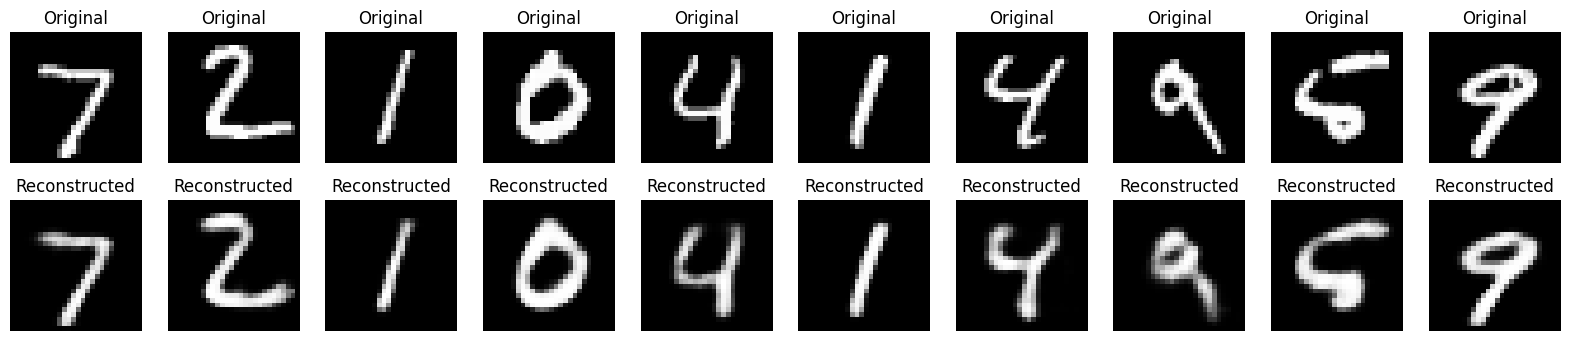

In [ ]:
# Visualize the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


**Explanation:**

**n = 10:** Specifies the number of images to display.

**plt.figure(figsize=(20, 4)):** Sets the size of the figure for plotting.

**for i in range(n)::** Loops over the first n images in the test set.

**Displaying Original Images:**
**ax = plt.subplot(2, n, i + 1):** Creates a subplot in a grid with 2 rows and n columns. The first row will display original images.

**plt.imshow(x_test[i].reshape(28, 28), cmap='gray'):** Displays the original image.

**x_test[i].reshape(28, 28):** Reshapes the flattened image back to 28x28 pixels.

***plt.title("Original"): **
*Sets the title of the subplot.

**plt.axis('off'):** Hides the axis ticks and labels.

**Displaying Reconstructed Images:**

**ax = plt.subplot(2, n, i + 1 + n):** Positions the subplot in the second row.

**plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray'):** Displays the reconstructed image.

**plt.title("Reconstructed"):** Sets the title of the subplot.

**plt.axis('off'):** Hides the axis ticks and labels.

**plt.show():** Renders the plot to the screen.

**What to Expect in the Visualization:**

The top row shows the original test images.

The bottom row shows the reconstructed images produced by the autoencoder.

The reconstructed images may appear slightly blurred or less detailed, reflecting the compression and reconstruction process.


**Additional Explanations**

Understanding the Autoencoder's Functionality:
Compression (Encoding):

The encoder compresses the input data into a lower-dimensional representation (latent space). In this example, it reduces 784-dimensional input to 32 dimensions.


**The network learns the most important features needed to reconstruct the input.**

Reconstruction (Decoding):

The decoder attempts to reconstruct the original input from the compressed representation.

By training the network to minimize the loss between the input and output, it learns to capture essential patterns.


Activation Functions:
ReLU (Rectified Linear Unit):activation='relu' in the encoder layer.
Introduces non-linearity, allowing the network to learn complex patterns.
ReLU function: f(x) = max(0, x)


Sigmoid:activation='sigmoid' in the decoder layer.
Outputs values between 0 and 1, matching the normalized pixel values.
Sigmoid function: f(x) = 1 / (1 + exp(-x))


Loss Function:Binary Crossentropy:
Suitable for comparing the similarity between the input and output images when pixel values are between 0 and 1.
Measures the difference between two probability distributions.


Understanding Keras APIs:

In the Sequential API, layers are added to the model using model.add(layer).

In the Functional API, layers are connected by calling them on tensors.
Add Layer vs. add() Method:
Add is a layer used for combining tensors.
model.add() is a method in the Sequential API used to add layers to the model.